Confusion Matrix:
[[85188   119]
 [   92    44]]
Accuracy: 99.75%


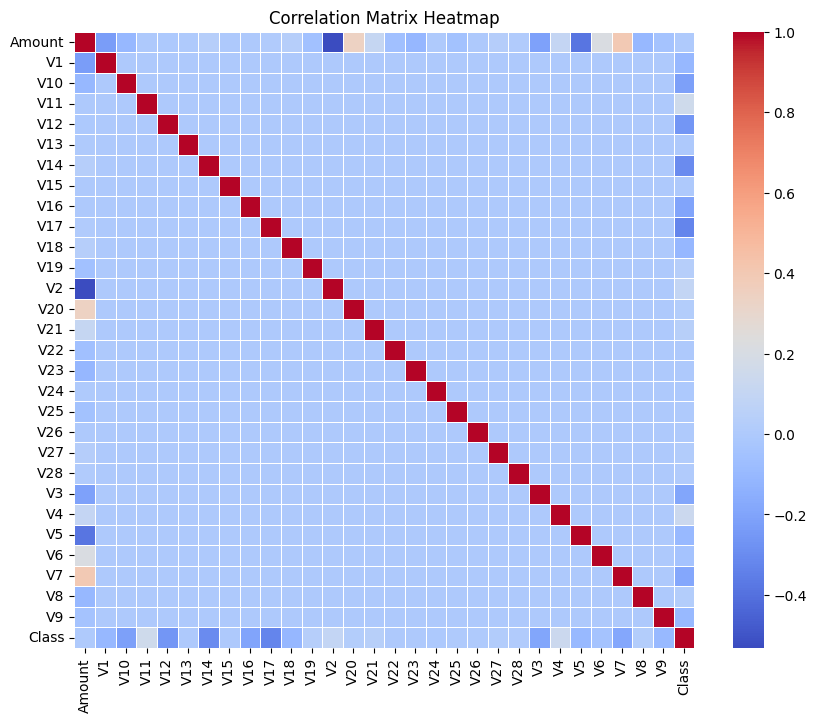

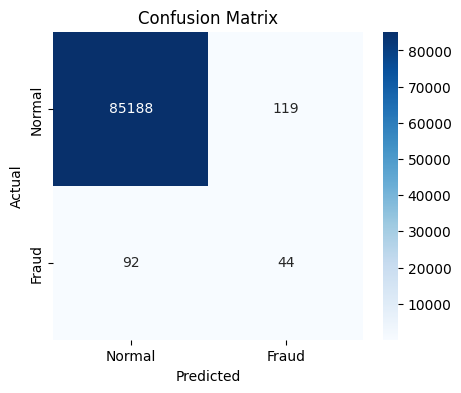

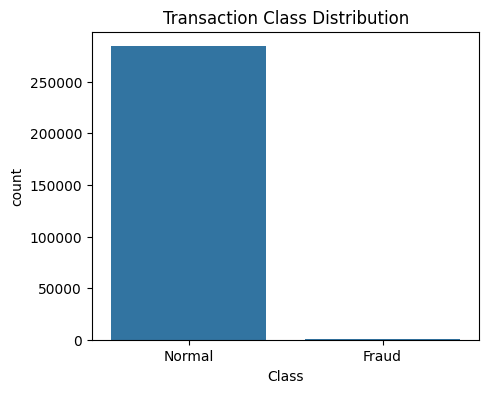

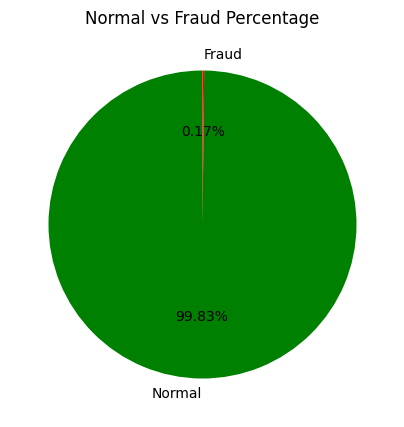


🔍 Test Your Own Transaction
Enter Amount: 258285
Enter V1: 456987
Enter V10: 74125
Enter V11: 99
Enter V12: 741
Enter V13: 85
Enter V14: 471
Enter V15: 558
Enter V16: 963
Enter V17: 582
Enter V18: 147
Enter V19: 47
Enter V2: 58
Enter V20: 69
Enter V21: 58
Enter V22: 14
Enter V23: 58
Enter V24: 25
Enter V25: 69
Enter V26: 58
Enter V27: 25
Enter V28: 142
Enter V3: 58
Enter V4: 74
Enter V5: 14
Enter V6: 253
Enter V7: 281
Enter V8: 958
Enter V9: 852
⚠️ This transaction is predicted as FRAUD.


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

# Load the dataset
data = pd.read_csv("creditcard.csv")

# -------------------- Preprocessing --------------------
# Drop the 'Time' column as it's not useful for our model
data = data.drop(columns=['Time'])

# Create a set of all feature columns (V1 to V28 + Amount)
feature_set = set(data.columns) - {'Class'}
# Convert set to sorted list for consistency
features = sorted(feature_set)

# Scale the 'Amount' feature only
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data[['Amount']])

# Split the data
X = data[features]
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# -------------------- Model Training --------------------
model = IsolationForest(contamination=0.002, random_state=42)
model.fit(X_train)

# Predict
y_pred = model.predict(X_test)
# Convert prediction: -1 = Fraud (1), 1 = Normal (0)
y_pred = [1 if x == -1 else 0 for x in y_pred]

# -------------------- Evaluation --------------------
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

print("Confusion Matrix:")
print(cm)

accuracy = (tp + tn) / (tp + tn + fp + fn)
print(f"Accuracy: {accuracy:.2%}")

# -------------------- Visualizations --------------------

# Correlation Matrix Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data[features + ['Class']].corr(), cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Confusion Matrix Heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Count Plot (Normal vs Fraud)
plt.figure(figsize=(5, 4))
sns.countplot(x='Class', data=data)
plt.title("Transaction Class Distribution")
plt.xticks([0, 1], ['Normal', 'Fraud'])
plt.show()

# Pie Chart
labels = ['Normal', 'Fraud']
sizes = data['Class'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=90, colors=['green', 'red'])
plt.title("Normal vs Fraud Percentage")
plt.show()

# -------------------- User Input Prediction --------------------
print("\n🔍 Test Your Own Transaction")

try:
    user_data = {}
    for feature in features:
        value = float(input(f"Enter {feature}: "))
        user_data[feature] = value

    user_df = pd.DataFrame([user_data])
    # Scale the amount field
    user_df['Amount'] = scaler.transform(user_df[['Amount']])

    # Predict
    result = model.predict(user_df)[0]
    if result == -1:
        print("⚠️ This transaction is predicted as FRAUD.")
    else:
        print("✅ This transaction is predicted as NORMAL.")
except:
    print("❌ Invalid input.")
